In [3]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [4]:
#read the csv file and store as a panda's dataframe
df = pd.read_csv(r"https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [5]:
#.dtypes is used to check the data types of all the columns to get a rough idea of the data you will be working with
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                           int64
population_density                 float64
median_age                         float64
aged_65_old

In [6]:
#drop the data/columns not required so improve the processing times
df.drop(['iso_code', 'new_cases_per_million','total_deaths_per_million','new_deaths_per_million','tests_units','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','total_tests_per_thousand','new_tests_smoothed_per_thousand'], axis=1, inplace=True)

In [7]:
#date is of the datatype char/object so change it to datetime format so it is easier to plot datetime on x axis
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [8]:
#create a new column with only the year and month
df['year-month'] = df['date'].dt.strftime('%Y-%m')

In [9]:
#set location column as the index
df1 = df.set_index('location')
df1.head()

continent       date  total_cases  new_cases  total_deaths  \
location                                                                 
Afghanistan      Asia 2019-12-31          0.0        0.0           0.0   
Afghanistan      Asia 2020-01-01          0.0        0.0           0.0   
Afghanistan      Asia 2020-01-02          0.0        0.0           0.0   
Afghanistan      Asia 2020-01-03          0.0        0.0           0.0   
Afghanistan      Asia 2020-01-04          0.0        0.0           0.0   

             new_deaths  total_cases_per_million  total_tests  new_tests  \
location                                                                   
Afghanistan         0.0                      0.0          NaN        NaN   
Afghanistan         0.0                      0.0          NaN        NaN   
Afghanistan         0.0                      0.0          NaN        NaN   
Afghanistan         0.0                      0.0          NaN        NaN   
Afghanistan         0.0                      0.0          NaN        NaN   

             new_tests_per_thousand  new_tests_smoothed  stringency_index  \
location                                                                    
Afghanistan                     NaN                 NaN               NaN   
Afghanistan                     NaN                 NaN               0.0   
Afghanistan                     NaN                 NaN               0.0   
Afghanistan                     NaN                 NaN               0.0   
Afghanistan                     NaN                 NaN               0.0   

             population  hospital_beds_per_thousand  life_expectancy  \
location                                                               
Afghanistan    38928341                         0.5            64.83   
Afghanistan    38928341                         0.5            64.83   
Afghanistan    38928341                         0.5            64.83   
Afghanistan    38928341                         0.5            64.83   
Afghanistan    38928341                         0.5            64.83   

            year-month  
location                
Afghanistan    2019-12  
Afghanistan    2020-01  
Afghanistan    2020-01  
Afghanistan    2020-01  
Afghanistan    2020-01

In [10]:
df_india = df1.loc['India',:]
df_us = df1.loc['United States',:]
df_world = df1.loc['World',:]

In [11]:
df_india.plot.line(x="date", y=["new_cases", "new_deaths"],figsize=(200,100),fontsize=100,linewidth=15.0)
#plt.yscale('log')
plt.legend(fontsize=150)
plt.grid(color='black', linestyle='--', linewidth=3)
plt.tick_params(labelsize=150, pad=5)

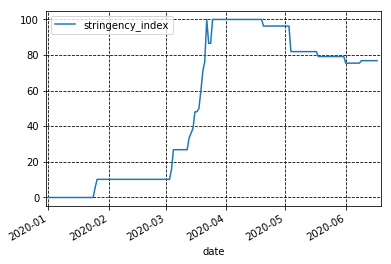

In [12]:
df_india.plot.line(x="date",y="stringency_index")
plt.grid(color='black', linestyle='--')

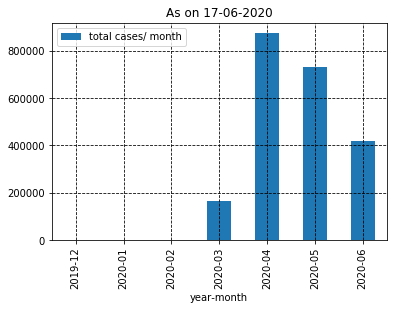

In [13]:
df_india1 = df_us.groupby('year-month').sum()
df_india1.plot.bar(y='new_cases',title='As on 17-06-2020', label='total cases/ month')
plt.grid(color='black', linestyle='--')

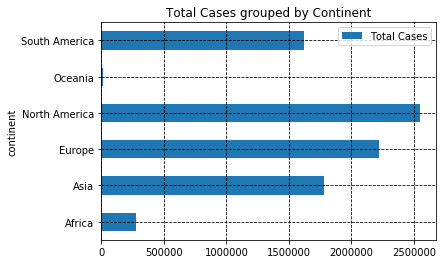

In [14]:
df_cont = df.groupby('continent').sum()
df_cont.plot.barh(y='new_cases',title='Total Cases grouped by Continent', label='Total Cases')
plt.grid(color='black', linestyle='--')

In [15]:
#df_country = df.groupby('location').sum().sort_values(by='new_cases')
df_country = df1.groupby('location').sum().nlargest(10,'new_cases').sort_values(by='new_cases')
df_country.plot.barh(y='new_cases',figsize=(200,100),fontsize=75, label='Total Cases')
plt.legend(fontsize=150)
plt.grid(color='black', linestyle='--')
plt.tick_params(labelsize=150, pad=20)
plt.tight_layout()

In [16]:
df_world.plot.line(x="date", y=["total_cases", "total_deaths"],figsize=(200,100),fontsize=60,lw=15)
plt.yscale('log')
plt.legend(fontsize=150)
plt.tick_params(labelsize=150, pad=20)
plt.tight_layout()

In [17]:
df_india['5 day average'] = df_india.iloc[:,3].rolling(window=5).mean()

C:\Users\MIHIR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_india.plot.line(x="date", y=["new_cases", "5 day average"],figsize=(200,100),fontsize=100,linewidth=15.0)
#plt.yscale('log')
plt.legend(fontsize=150)
plt.grid(color='black', linestyle='--', linewidth=3)
plt.tick_params(labelsize=150, pad=5)

In [19]:
df.corr()['total_cases'].sort_values()

hospital_beds_per_thousand   -0.006231
life_expectancy               0.013280
total_cases_per_million       0.069751
stringency_index              0.079873
new_tests_per_thousand        0.145289
population                    0.584203
new_deaths                    0.775490
new_tests                     0.899020
new_tests_smoothed            0.905878
total_tests                   0.907488
new_cases                     0.930915
total_deaths                  0.988311
total_cases                   1.000000
Name: total_cases, dtype: float64

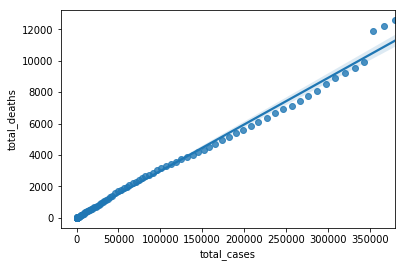

In [20]:
sns.regplot(x='total_cases',y='total_deaths',data=df_india)

In [21]:
corr = df.corr()

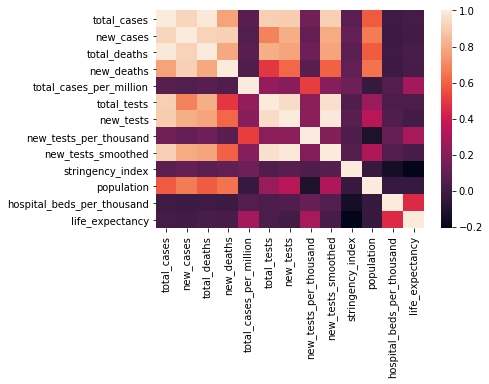

In [22]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

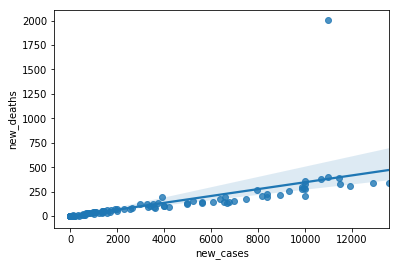

In [23]:
sns.regplot(x='new_cases',y='new_deaths',data=df_india)